Problem Statement

Training deficiencies for an anonymous department in an organisation have been collected from 2016 to 2020. It is worth noting that the COV19 pandemic started in early 2020 and this would have an effect on the training deficiencies.

The task is to analyse this data to look for trends.

Load libraries

In [342]:
#import libraries
import sys
print('Python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy as np
print('numpy: {}'.format(np.__version__))
import matplotlib
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas as pd
print('pandas: {}'.format(pd.__version__))
import sklearn 
print('sklearn: {}'.format(sklearn.__version__))
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))

Python: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
scipy: 1.4.1
numpy: 1.18.5
matplotlib: 3.2.2
pandas: 1.1.4
sklearn: 0.22.2.post1
seaborn: 0.11.0


Load and read csv file

In [343]:
# load datasets
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Misc-Predictions/main/Anon%20Training%20Deficiency%20-%20Anon%20Training%20Deficiency%20(1).csv')
train['ID'] = train.index
train = train[['ID', 'Month Year', 'Training Deficiency']]
train

,ID,Month Year,Training Deficiency
0,0,Jun-16,111
1,1,Jul-16,124
2,2,Aug-16,133
3,3,Sep-16,139
4,4,Oct-16,131
5,5,Nov-16,149
6,6,Dec-16,171
7,7,Jan-17,189
8,8,Feb-17,207
9,9,Mar-17,210


Make copy of dataframe

In [344]:
# Making copy of datasets
train_original=train.copy() 

In [345]:
train_original.shape

(53, 3)

In [346]:
train.index

RangeIndex(start=0, stop=53, step=1)

In [347]:
train.shape

(53, 3)

In [348]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   53 non-null     int64 
 1   Month Year           53 non-null     object
 2   Training Deficiency  53 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ KB


Convert month year to month and year

In [349]:
month = train['Month Year'].astype(str)
train['Month'] = month.str[:-3]
train

,ID,Month Year,Training Deficiency,Month
0,0,Jun-16,111,Jun
1,1,Jul-16,124,Jul
2,2,Aug-16,133,Aug
3,3,Sep-16,139,Sep
4,4,Oct-16,131,Oct
5,5,Nov-16,149,Nov
6,6,Dec-16,171,Dec
7,7,Jan-17,189,Jan
8,8,Feb-17,207,Feb
9,9,Mar-17,210,Mar


In [350]:
dic = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
train.Month = train.Month.map(dic)
train

,ID,Month Year,Training Deficiency,Month
0,0,Jun-16,111,6
1,1,Jul-16,124,7
2,2,Aug-16,133,8
3,3,Sep-16,139,9
4,4,Oct-16,131,10
5,5,Nov-16,149,11
6,6,Dec-16,171,12
7,7,Jan-17,189,1
8,8,Feb-17,207,2
9,9,Mar-17,210,3


In [351]:
year = train['Month Year'].astype(str)
train['Year'] = "20" + year.str[4:]
train

,ID,Month Year,Training Deficiency,Month,Year
0,0,Jun-16,111,6,2016
1,1,Jul-16,124,7,2016
2,2,Aug-16,133,8,2016
3,3,Sep-16,139,9,2016
4,4,Oct-16,131,10,2016
5,5,Nov-16,149,11,2016
6,6,Dec-16,171,12,2016
7,7,Jan-17,189,1,2017
8,8,Feb-17,207,2,2017
9,9,Mar-17,210,3,2017


Graph data

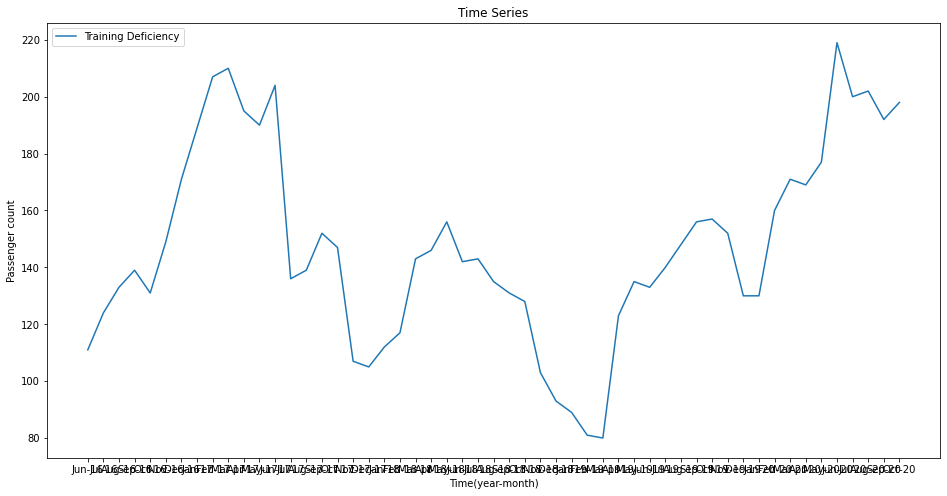

In [352]:
from pandas.plotting import register_matplotlib_converters
train.index = train['Month Year'] # indexing the Datetime to get the time period on the x-axis. 
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 
ts = df['Training Deficiency'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Training Deficiency') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

In [353]:
ts

Month Year
Jun-16    111
Jul-16    124
Aug-16    133
Sep-16    139
Oct-16    131
Nov-16    149
Dec-16    171
Jan-17    189
Feb-17    207
Mar-17    210
Apr-17    195
May-17    190
Jun-17    204
Jul-17    136
Aug-17    139
Sep-17    152
Oct-17    147
Nov-17    107
Dec-17    105
Jan-18    112
Feb-18    117
Mar-18    143
Apr-18    146
May-18    156
Jun-18    142
Jul-18    143
Aug-18    135
Sep-18    131
Oct-18    128
Nov-18    103
Dec-18     93
Jan-19     89
Feb-19     81
Mar-19     80
Apr-19    123
May-19    135
Jun-19    133
Jul 19    140
Aug 19    148
Sep-19    156
Oct-19    157
Nov-19    152
Dec-19    130
Jan-20    130
Feb-20    160
Mar-20    171
Apr-20    169
May-20    177
Jun-20    219
Jul-20    200
Aug-20    202
Sep-20    192
Oct-20    198
Name: Training Deficiency, dtype: int64

In [354]:
df

,Month Year,Training Deficiency,Month,Year
Month Year,,,,
Jun-16,Jun-16,111,6,2016
Jul-16,Jul-16,124,7,2016
Aug-16,Aug-16,133,8,2016
Sep-16,Sep-16,139,9,2016
Oct-16,Oct-16,131,10,2016
Nov-16,Nov-16,149,11,2016
Dec-16,Dec-16,171,12,2016
Jan-17,Jan-17,189,1,2017
Feb-17,Feb-17,207,2,2017


Text(0, 0.5, 'Training Deficiency')

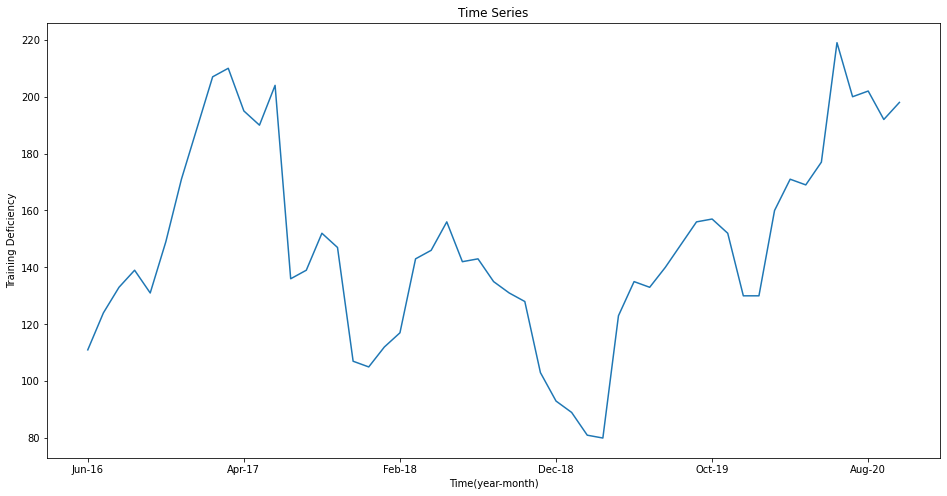

In [355]:
# different way of plotting passenger count for training dataset. 
train['Training Deficiency'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Training Deficiency") 

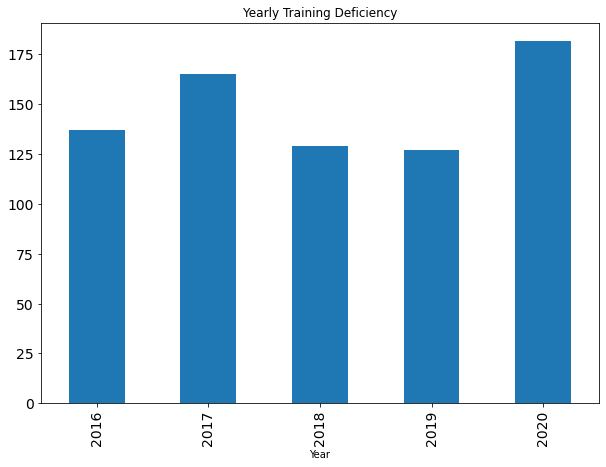

In [356]:
train.groupby('Year')['Training Deficiency'].mean().plot.bar(fontsize=14,figsize=(10,7),title='Yearly Training Deficiency')

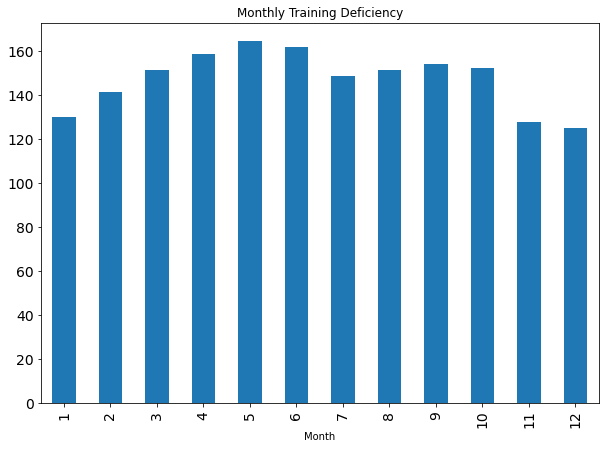

In [357]:
train.groupby('Month')['Training Deficiency'].mean().plot.bar(fontsize=14,figsize=(10,7), title='Monthly Training Deficiency')

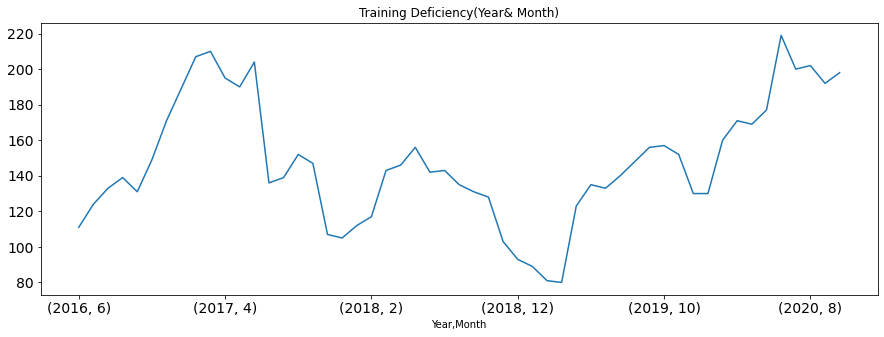

In [358]:
temp=train.groupby(['Year', 'Month'])['Training Deficiency'].mean() 
temp.plot(figsize=(15,5), title= 'Training Deficiency(Year& Month)', fontsize=14)

In [359]:
#basic modeling techniques
train=train.drop('ID',1)

In [360]:
train.Year = train.Year.astype(str)
train.Month = train.Month.astype(str)
train['Datetime'] = "28-" + train['Month'] + "-" + train['Year']  
train

,Month Year,Training Deficiency,Month,Year,Datetime
Month Year,,,,,
Jun-16,Jun-16,111,6,2016,28-6-2016
Jul-16,Jul-16,124,7,2016,28-7-2016
Aug-16,Aug-16,133,8,2016,28-8-2016
Sep-16,Sep-16,139,9,2016,28-9-2016
Oct-16,Oct-16,131,10,2016,28-10-2016
Nov-16,Nov-16,149,11,2016,28-11-2016
Dec-16,Dec-16,171,12,2016,28-12-2016
Jan-17,Jan-17,189,1,2017,28-1-2017
Feb-17,Feb-17,207,2,2017,28-2-2017


In [361]:
train['Timestamp'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y') 
train.index = train.Timestamp 
# Converting to monthly mean 
monthly = train.resample('M').mean()
train

,Month Year,Training Deficiency,Month,Year,Datetime,Timestamp
Timestamp,,,,,,
2016-06-28,Jun-16,111,6,2016,28-6-2016,2016-06-28
2016-07-28,Jul-16,124,7,2016,28-7-2016,2016-07-28
2016-08-28,Aug-16,133,8,2016,28-8-2016,2016-08-28
2016-09-28,Sep-16,139,9,2016,28-9-2016,2016-09-28
2016-10-28,Oct-16,131,10,2016,28-10-2016,2016-10-28
2016-11-28,Nov-16,149,11,2016,28-11-2016,2016-11-28
2016-12-28,Dec-16,171,12,2016,28-12-2016,2016-12-28
2017-01-28,Jan-17,189,1,2017,28-1-2017,2017-01-28
2017-02-28,Feb-17,207,2,2017,28-2-2017,2017-02-28


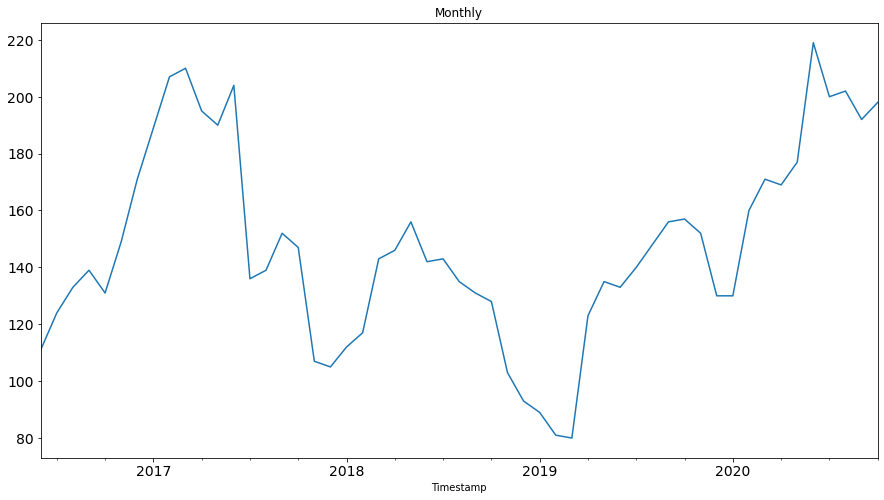

In [362]:
monthly['Training Deficiency'].plot(figsize=(15,8), title= 'Monthly', fontsize=14)

In [363]:
train.shape

(53, 6)

In [364]:
train.Timestamp = pd.to_datetime(train['Datetime'],format='%d-%m-%Y') 
train.index = train.Timestamp 
# Converting to daily mean 
train = train.resample('M').mean()
train

,Training Deficiency
Timestamp,
2016-06-30,111
2016-07-31,124
2016-08-31,133
2016-09-30,139
2016-10-31,131
2016-11-30,149
2016-12-31,171
2017-01-31,189
2017-02-28,207


Define training and validation sets

In [365]:
Train=train.loc['2016-06-30':'2019-12-31'] 
valid=train.loc['2020-01-31':'2020-10-31']

In [366]:
Train

,Training Deficiency
Timestamp,
2016-06-30,111
2016-07-31,124
2016-08-31,133
2016-09-30,139
2016-10-31,131
2016-11-30,149
2016-12-31,171
2017-01-31,189
2017-02-28,207


In [367]:
valid

,Training Deficiency
Timestamp,
2020-01-31,130
2020-02-29,160
2020-03-31,171
2020-04-30,169
2020-05-31,177
2020-06-30,219
2020-07-31,200
2020-08-31,202
2020-09-30,192


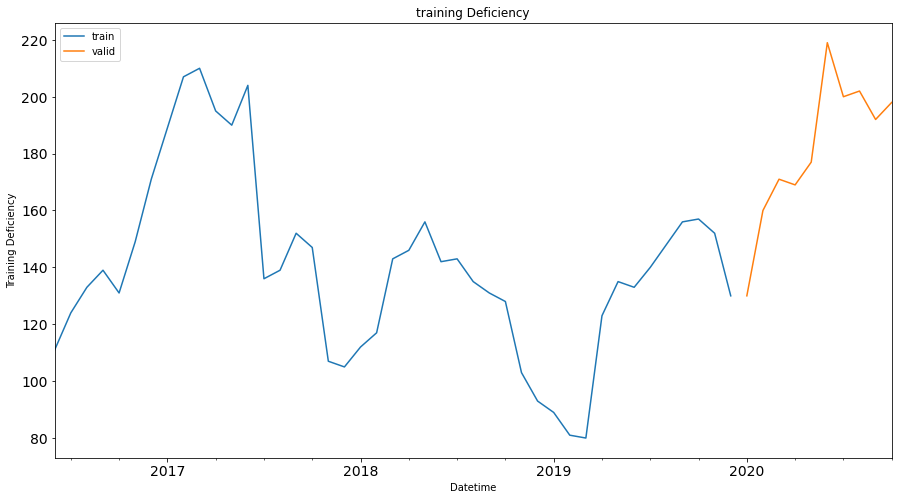

In [368]:
Train['Training Deficiency'].plot(figsize=(15,8), title= 'Training Deficiency', fontsize=14, label='train') 
valid['Training Deficiency'].plot(figsize=(15,8), title= 'training Deficiency', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Training Deficiency") 
plt.legend(loc='best') 
plt.show()

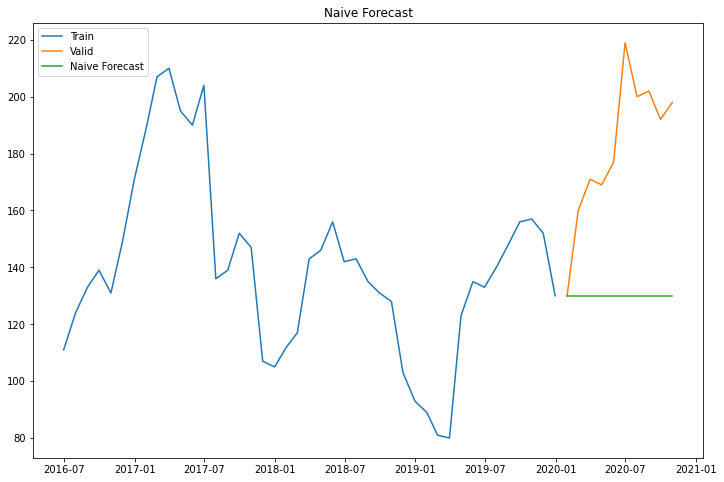

In [369]:
#naive approach
dd= np.asarray(Train['Training Deficiency']) 
y_hat = valid.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Training Deficiency'], label='Train') 
plt.plot(valid.index,valid['Training Deficiency'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

Calculate errors

In [370]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid['Training Deficiency'], y_hat.naive)) 
print(rms)

57.25731394328589


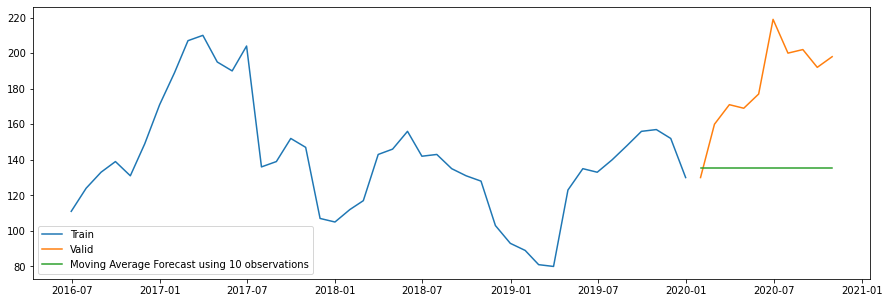

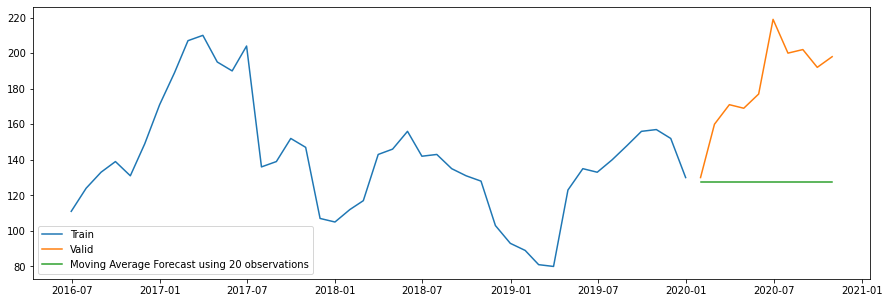

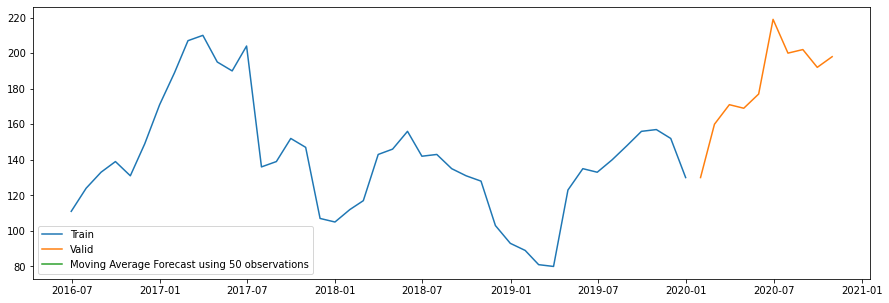

In [371]:
#moving average
# Considering rolling mean for last 10, 20, 50 days and visualize the results.
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Training Deficiency'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Training Deficiency'], label='Train') 
plt.plot(valid['Training Deficiency'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Training Deficiency'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Training Deficiency'], label='Train') 
plt.plot(valid['Training Deficiency'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Training Deficiency'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Training Deficiency'], label='Train') 
plt.plot(valid['Training Deficiency'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [374]:
# RMSE value for Moving Average 
#rms = sqrt(mean_squared_error(valid['Training Deficiency'], y_hat_avg.moving_avg_forecast)) 
#print(rms)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


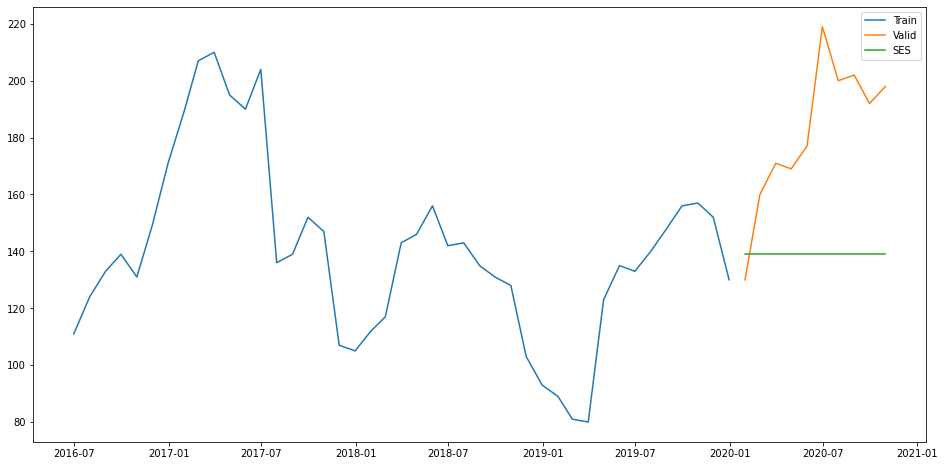

In [375]:
#simple exponential moving
#Here the predictions are made by assigning larger weight to the recent values and lesser weight to the old values.
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Training Deficiency'])).fit(smoothing_level=0.6,optimized=False) 
y_hat_avg['SES'] = fit2.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Training Deficiency'], label='Train') 
plt.plot(valid['Training Deficiency'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [377]:
rms = sqrt(mean_squared_error(valid['Training Deficiency'], y_hat_avg.SES)) 
print(rms)

49.08625316259575


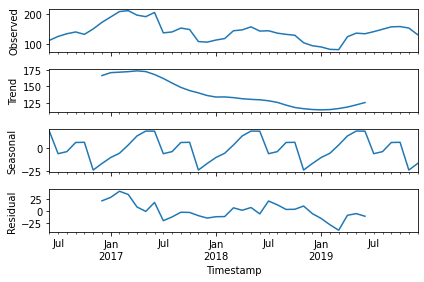

In [378]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train['Training Deficiency']).plot() 
result = sm.tsa.stattools.adfuller(train['Training Deficiency']) 
plt.show()

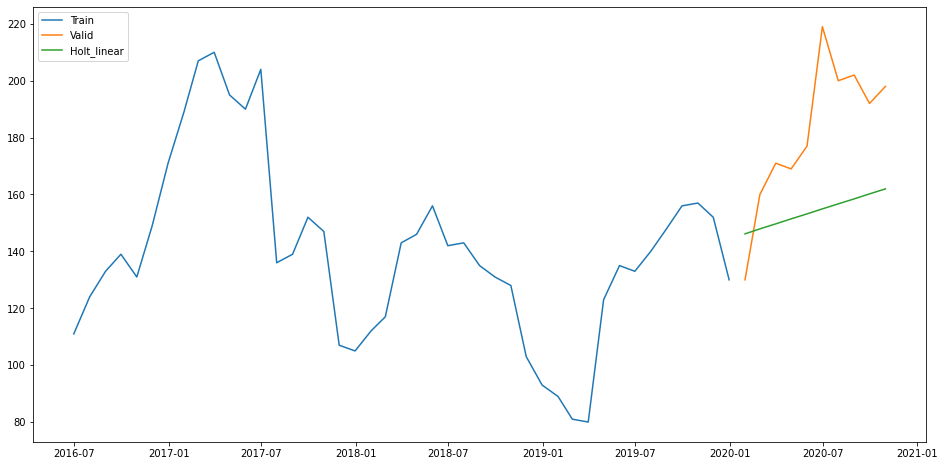

In [379]:
#holt's linear trend model
y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['Training Deficiency'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Training Deficiency'], label='Train') 
plt.plot(valid['Training Deficiency'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [380]:
# Calculating the RMSE of the model
rms = sqrt(mean_squared_error(valid['Training Deficiency'], y_hat_avg.Holt_linear)) 
print(rms)

34.524406842812986


In [381]:
y_hat_avg.Holt_linear

Timestamp
2020-01-31    146.159045
2020-02-29    147.916211
2020-03-31    149.673377
2020-04-30    151.430543
2020-05-31    153.187709
2020-06-30    154.944875
2020-07-31    156.702040
2020-08-31    158.459206
2020-09-30    160.216372
2020-10-31    161.973538
Freq: M, Name: Holt_linear, dtype: float64

In [382]:
valid['Training Deficiency'].shape, y_hat_avg.Holt_linear.shape

((10,), (10,))

Compare actual values against predicted values

In [385]:
df_val=pd.DataFrame({'Actual': valid['Training Deficiency'], 'Predicted': y_hat_avg.Holt_linear.astype(int)})
df_val

,Actual,Predicted
Timestamp,,
2020-01-31,130,146
2020-02-29,160,147
2020-03-31,171,149
2020-04-30,169,151
2020-05-31,177,153
2020-06-30,219,154
2020-07-31,200,156
2020-08-31,202,158
2020-09-30,192,160
